In [11]:
def extraerCerebro(rutaArchivo):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.filters import threshold_multiotsu
    from skimage.morphology import convex_hull_image


    img = cv2.imread(rutaArchivo, cv2.IMREAD_COLOR)


    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)


    numClases = 5
    dstGray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
    #Los umbrales son siempre 1 menos que las categorías
    umbrales = threshold_multiotsu(dstGray,numClases)
    regions = np.digitize(dstGray,bins=umbrales)




    regionsOfInterest = [1,2]   #TODO modificar dinámicamente???
    mask = img.copy()
    mask[True]=0        #Limpiar la máscara a ceros

    for i in range(len(regionsOfInterest)):
        mask[regions==regionsOfInterest[i]]=255




    # **Operaciones sobre la máscara**


    #Erosionar
    kernel = np.ones((2,2), np.uint8) 
    # img_erode = cv2.erode(img2, kernel, iterations=1)

    mask = cv2.erode(mask,kernel,iterations=2)





    # **Separar componente de mayor tamaño**


    from scipy import ndimage
    label_im, nb_labels = ndimage.label(mask)
    nb_labels # how many regions?


    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))

    print(max(sizes))

    mask_size = sizes < max(sizes)

    remove_pixel = mask_size[label_im]
    remove_pixel.shape

    label_im[remove_pixel] = 0
    label_im[label_im>=1]=255



    from skimage import color
    imgGray = color.rgb2gray(img)
    out = img.copy()
    for i in range(label_im.shape[0]):
        for j in range(label_im.shape[1]):
            if(label_im[i][j].any()):
                out[i][j]=img[i][j]
            else:
                out[i][j]=255

    # fig6=plt.figure(figsize = (8,8))
    # a = fig6.add_subplot(1, 2, 1)
    # plt.imshow(img, cmap='gray',vmin=0,vmax=2**8)
    # plt.axis('off');

    # b = fig6.add_subplot(1, 2, 2)
    # plt.imshow(out, cmap='gray',vmin=0,vmax=2**8)
    # plt.axis('off');

    return out

Data/CK/1/img001out.bmp Data/CK/1/img001.bmp
1171980.0
Data/CK/1/img002out.bmp Data/CK/1/img002.bmp
1218645.0
Data/CK/1/img003out.bmp Data/CK/1/img003.bmp
2337075.0
Data/CK/1/img004out.bmp Data/CK/1/img004.bmp
5707665.0
Data/CK/1/img005out.bmp Data/CK/1/img005.bmp
7099965.0
Data/CK/1/img006out.bmp Data/CK/1/img006.bmp
8755425.0
Data/CK/1/img007out.bmp Data/CK/1/img007.bmp
9352125.0
Data/CK/1/img008out.bmp Data/CK/1/img008.bmp
10262475.0
Data/CK/1/img009out.bmp Data/CK/1/img009.bmp
13658310.0
Data/CK/1/img010out.bmp Data/CK/1/img010.bmp
17217090.0
Data/CK/1/img011out.bmp Data/CK/1/img011.bmp
16917975.0
Data/CK/1/img012out.bmp Data/CK/1/img012.bmp
22594275.0
Data/CK/1/img013out.bmp Data/CK/1/img013.bmp
25427070.0
Data/CK/1/img014out.bmp Data/CK/1/img014.bmp
24474645.0
Data/CK/1/img015out.bmp Data/CK/1/img015.bmp
24721740.0
Data/CK/1/img016out.bmp Data/CK/1/img016.bmp
25008615.0
Data/CK/1/img017out.bmp Data/CK/1/img017.bmp
25603785.0
Data/CK/1/img018out.bmp Data/CK/1/img018.bmp
24169410.0

[ WARN:0@2163.370] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('Data/CK/1/img029.bmp'): can't open/read file: check file path/integrity


error: OpenCV(4.5.5) /io/opencv/modules/photo/src/denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'fastNlMeansDenoisingColored'


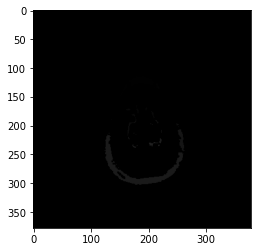

In [10]:
import cv2
pacienteArcivo="Data/CK/1/"
for i in range(1,30):
    num = str(i)
    num = num.zfill(3)
    name = pacienteArcivo+"img"+num+".bmp"
    outName = pacienteArcivo+"img"+num+"out"+".bmp"
    print(outName,name)

    out = extraerCerebro(name)

    #guardar imaen
    cv2.imwrite(outName,out)